In [1]:
import os
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("FacebookAdAnalysis") \
    .getOrCreate()

# Load the dataset from HDFS
file_path = "/data/ProjectDatasetFacebookAU/*"
df = spark.read.json(file_path)

24/05/24 19:03:12 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [2]:
df.printSchema()

root
 |-- ad_creation_time: string (nullable = true)
 |-- ad_creative_bodies: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_body: string (nullable = true)
 |-- ad_creative_link_caption: string (nullable = true)
 |-- ad_creative_link_captions: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_link_description: string (nullable = true)
 |-- ad_creative_link_descriptions: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_link_title: string (nullable = true)
 |-- ad_creative_link_titles: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_delivery_start_time: string (nullable = true)
 |-- ad_delivery_stop_time: string (nullable = true)
 |-- ad_snapshot_url: string (nullable = true)
 |-- bylines: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- delivery_by_region: array (nullable = true)
 |    |-- element: struct (containsN

In [3]:
df.describe().toPandas()

24/05/24 19:03:43 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,summary,ad_creation_time,ad_creative_body,ad_creative_link_caption,ad_creative_link_description,ad_creative_link_title,ad_delivery_start_time,ad_delivery_stop_time,ad_snapshot_url,bylines,currency,funding_entity,id,page_id,page_name
0,count,39584139,9568757,8249081,6875053,8327851,39584139,508192,39584139,6045779,15737565,15610977,39584139,39584139,39584052
1,mean,None,None,None,None,2020.2068965517242,None,None,None,None,None,None,1.2142926394001878E15,9.709071354707299E14,Infinity
2,stddev,None,None,None,None,0.4122508203948578,None,None,None,None,None,None,1.61414547976514E15,9.236163275359376E15,NaN
3,min,2019-12-26,,"""Prospective Issues, 2021"" with Ross Cameron",\n,,2019-12-26,2020-02-29T00:50:59+0000,https://www.facebook.com/ads/archive/render_ad...,Jacqui Lambie Network,AED,Australian Labor Party (NSW Branch),1000000221093680,0,Muhoo Optical
4,max,2024-03-21,"🫵🏽 Have you had ENOUGH of the bs, lack of clim...",普通话性别平等问答 Mandarin Q & A on Gender Equality,🪶 Gentle on your hair & our planet 🌱,🪶 Use code RETURN15 to get 15% Off now 🌐,2024-03-21,2024-03-20,https://www.facebook.com/ads/archive/render_ad...,trace,ZAR,voting.org.au,999999901277346,999938273365650,🎀wholsale 🎀toptan Satış


In [4]:
df.count()

39584139

In [5]:
df.columns

['ad_creation_time',
 'ad_creative_bodies',
 'ad_creative_body',
 'ad_creative_link_caption',
 'ad_creative_link_captions',
 'ad_creative_link_description',
 'ad_creative_link_descriptions',
 'ad_creative_link_title',
 'ad_creative_link_titles',
 'ad_delivery_start_time',
 'ad_delivery_stop_time',
 'ad_snapshot_url',
 'bylines',
 'currency',
 'delivery_by_region',
 'demographic_distribution',
 'estimated_audience_size',
 'funding_entity',
 'id',
 'impressions',
 'languages',
 'page_id',
 'page_name',
 'publisher_platforms',
 'region_distribution',
 'spend']

In [6]:
len(df.columns)

26

Removing duplicates

In [7]:
from pyspark.sql.functions import col, count, sum as _sum

duplicate_counts = df.groupBy("id").agg(count("id").alias("count"))
duplicates = duplicate_counts.filter(col("count") > 1)
total_duplicates = duplicates.select(_sum("count")).collect()[0][0] - duplicates.count()
total_duplicates

27731235

In [8]:
df = df.dropDuplicates(['id'])

In [9]:
df.count()

11852904

In [10]:
df.printSchema()

root
 |-- ad_creation_time: string (nullable = true)
 |-- ad_creative_bodies: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_body: string (nullable = true)
 |-- ad_creative_link_caption: string (nullable = true)
 |-- ad_creative_link_captions: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_link_description: string (nullable = true)
 |-- ad_creative_link_descriptions: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_link_title: string (nullable = true)
 |-- ad_creative_link_titles: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_delivery_start_time: string (nullable = true)
 |-- ad_delivery_stop_time: string (nullable = true)
 |-- ad_snapshot_url: string (nullable = true)
 |-- bylines: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- delivery_by_region: array (nullable = true)
 |    |-- element: struct (containsN

In [11]:
df.select("ad_creation_time").show(20, truncate=False)

+----------------+
|ad_creation_time|
+----------------+
|2023-10-19      |
|2023-09-13      |
|2023-10-02      |
|2023-09-09      |
|2023-09-29      |
|2023-12-08      |
|2023-08-19      |
|2023-08-25      |
|2023-10-03      |
|2023-12-11      |
|2023-10-11      |
|2023-10-11      |
|2023-09-23      |
|2023-10-15      |
|2023-10-05      |
|2022-12-07      |
|2023-10-06      |
|2023-09-21      |
|2023-09-15      |
|2023-10-14      |
+----------------+
only showing top 20 rows



### Handling Null Values in String Columns

In [12]:
from pyspark.sql.functions import col, count, when, to_timestamp

# string columns
string_columns = [
    'ad_creation_time', 'ad_creative_body', 'ad_creative_link_caption', 
    'ad_creative_link_description', 'ad_creative_link_title', 
    'ad_delivery_start_time', 'ad_delivery_stop_time', 'ad_snapshot_url', 
    'bylines', 'currency', 'funding_entity', 'page_id', 'page_name'
]

print("Null count before replacement:")
for column in string_columns:
    null_count = df.select(count(when(col(column).isNull(), column)).alias("Null_Count")).collect()[0]["Null_Count"]
    print(f"Null count in {column}: {null_count}")

Null count before replacement:


Null count in ad_creation_time: 0


Null count in ad_creative_body: 11625985


Null count in ad_creative_link_caption: 11695750


Null count in ad_creative_link_description: 11724972


Null count in ad_creative_link_title: 11691746


Null count in ad_delivery_start_time: 0


Null count in ad_delivery_stop_time: 11841143


Null count in ad_snapshot_url: 0


Null count in bylines: 11652076


Null count in currency: 11420318


Null count in funding_entity: 11429688


Null count in page_id: 0


Null count in page_name: 41


In [13]:
string_columns_with_nulls = [
    'ad_creative_body', 'ad_creative_link_caption', 
    'ad_creative_link_description', 'ad_creative_link_title', 
    'ad_delivery_stop_time', 'bylines', 'currency', 
    'funding_entity', 'page_name'
]

for column in string_columns_with_nulls:
    df = df.withColumn(column, when(col(column).isNull(), "").otherwise(col(column)))

print("Null count after replacement:")
for column in string_columns:
    null_count = df.select(count(when(col(column).isNull(), column)).alias("Null_Count")).collect()[0]["Null_Count"]
    print(f"Null count in {column}: {null_count}")

Null count after replacement:


Null count in ad_creation_time: 0


Null count in ad_creative_body: 0


Null count in ad_creative_link_caption: 0


Null count in ad_creative_link_description: 0


Null count in ad_creative_link_title: 0


Null count in ad_delivery_start_time: 0


Null count in ad_delivery_stop_time: 0


Null count in ad_snapshot_url: 0


Null count in bylines: 0


Null count in currency: 0


Null count in funding_entity: 0


Null count in page_id: 0


Null count in page_name: 0


### Handling Null Values in Array Columns

In [14]:
from pyspark.sql.functions import col, count, when, array

# array columns
array_columns = [
    'ad_creative_bodies', 'ad_creative_link_captions', 
    'ad_creative_link_descriptions', 'ad_creative_link_titles', 
    'languages', 'publisher_platforms'
]

for column in array_columns:
    null_count = df.select(count(when(col(column).isNull(), column)).alias("Null_Count")).collect()[0]["Null_Count"]
    print(f"Null count in {column} before replacement: {null_count}")

for column in array_columns:
    df = df.withColumn(column, when(col(column).isNull(), array()).otherwise(col(column)))

for column in array_columns:
    null_count = df.select(count(when(col(column).isNull(), column)).alias("Null_Count")).collect()[0]["Null_Count"]
    print(f"Null count in {column} after replacement: {null_count}")

Null count in ad_creative_bodies before replacement: 1039873


Null count in ad_creative_link_captions before replacement: 742809


Null count in ad_creative_link_descriptions before replacement: 6699160


Null count in ad_creative_link_titles before replacement: 2622029


Null count in languages before replacement: 3868289


Null count in publisher_platforms before replacement: 230089


Null count in ad_creative_bodies after replacement: 0


Null count in ad_creative_link_captions after replacement: 0


Null count in ad_creative_link_descriptions after replacement: 0


Null count in ad_creative_link_titles after replacement: 0


Null count in languages after replacement: 0


Null count in publisher_platforms after replacement: 0


### Handling Null Values in Struct Columns

In [15]:
from pyspark.sql.functions import col, count, when, struct, lit, array

# struct and array<struct> columns
struct_columns = [
    'estimated_audience_size', 'impressions', 'spend', 
    'demographic_distribution', 'region_distribution'
]

for column in struct_columns:
    null_count = df.select(count(when(col(column).isNull(), column)).alias("Null_Count")).collect()[0]["Null_Count"]
    print(f"Null count in {column} before replacement: {null_count}")

default_estimated_audience_size = struct(lit("0").alias("lower_bound"), lit("0").alias("upper_bound"))
default_impressions = struct(lit("0").alias("lower_bound"), lit("0").alias("upper_bound"))
default_spend = struct(lit("0").alias("lower_bound"), lit("0").alias("upper_bound"))

df = df.withColumn("estimated_audience_size", when(col("estimated_audience_size").isNull(), default_estimated_audience_size).otherwise(col("estimated_audience_size")))
df = df.withColumn("impressions", when(col("impressions").isNull(), default_impressions).otherwise(col("impressions")))
df = df.withColumn("spend", when(col("spend").isNull(), default_spend).otherwise(col("spend")))

default_demographic = struct(lit("").alias("age"), lit("").alias("gender"), lit("0.0").alias("percentage"))
default_region = struct(lit("0.0").alias("percentage"), lit("").alias("region"))

df = df.withColumn("demographic_distribution", when(col("demographic_distribution").isNull(), array(default_demographic)).otherwise(col("demographic_distribution")))
df = df.withColumn("region_distribution", when(col("region_distribution").isNull(), array(default_region)).otherwise(col("region_distribution")))

for column in struct_columns:
    null_count = df.select(count(when(col(column).isNull(), column)).alias("Null_Count")).collect()[0]["Null_Count"]
    print(f"Null count in {column} after replacement: {null_count}")


Null count in estimated_audience_size before replacement: 11651782


Null count in impressions before replacement: 11420318


Null count in spend before replacement: 11420318


Null count in demographic_distribution before replacement: 11486308


Null count in region_distribution before replacement: 11491738


Null count in estimated_audience_size after replacement: 0


Null count in impressions after replacement: 0


Null count in spend after replacement: 0


Null count in demographic_distribution after replacement: 0


Null count in region_distribution after replacement: 0


In [16]:
df.printSchema()

root
 |-- ad_creation_time: string (nullable = true)
 |-- ad_creative_bodies: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_body: string (nullable = true)
 |-- ad_creative_link_caption: string (nullable = true)
 |-- ad_creative_link_captions: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_link_description: string (nullable = true)
 |-- ad_creative_link_descriptions: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_link_title: string (nullable = true)
 |-- ad_creative_link_titles: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_delivery_start_time: string (nullable = true)
 |-- ad_delivery_stop_time: string (nullable = true)
 |-- ad_snapshot_url: string (nullable = true)
 |-- bylines: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- delivery_by_region: array (nullable = true)
 |    |-- element: struct (containsN

### Converting some columns to timestamps

In [17]:
from pyspark.sql.functions import to_timestamp

df = df.withColumn("ad_creation_time", to_timestamp(col("ad_creation_time"), "yyyy-MM-dd"))
df = df.withColumn("ad_delivery_start_time", to_timestamp(col("ad_delivery_start_time"), "yyyy-MM-dd"))
df = df.withColumn("ad_delivery_stop_time", to_timestamp(col("ad_delivery_stop_time"), "yyyy-MM-dd"))

In [18]:
df.select("ad_creation_time").show(20, truncate=False)

+-------------------+
|ad_creation_time   |
+-------------------+
|2023-10-19 00:00:00|
|2023-09-13 00:00:00|
|2023-10-02 00:00:00|
|2023-09-09 00:00:00|
|2023-09-29 00:00:00|
|2023-12-08 00:00:00|
|2023-08-19 00:00:00|
|2023-08-25 00:00:00|
|2023-10-03 00:00:00|
|2023-12-11 00:00:00|
|2023-10-11 00:00:00|
|2023-10-11 00:00:00|
|2023-09-23 00:00:00|
|2023-10-15 00:00:00|
|2023-10-05 00:00:00|
|2022-12-07 00:00:00|
|2023-10-06 00:00:00|
|2023-09-21 00:00:00|
|2023-09-15 00:00:00|
|2023-10-14 00:00:00|
+-------------------+
only showing top 20 rows



In [19]:
df.select("ad_delivery_start_time").show(20, truncate=False)

+----------------------+
|ad_delivery_start_time|
+----------------------+
|2023-10-19 00:00:00   |
|2023-09-13 00:00:00   |
|2023-10-02 00:00:00   |
|2023-09-10 00:00:00   |
|2023-09-29 00:00:00   |
|2023-12-08 00:00:00   |
|2023-08-20 00:00:00   |
|2023-08-26 00:00:00   |
|2023-10-03 00:00:00   |
|2023-12-12 00:00:00   |
|2023-10-11 00:00:00   |
|2023-10-11 00:00:00   |
|2023-09-23 00:00:00   |
|2023-10-16 00:00:00   |
|2023-10-06 00:00:00   |
|2022-12-07 00:00:00   |
|2023-10-07 00:00:00   |
|2023-09-21 00:00:00   |
|2023-09-15 00:00:00   |
|2023-10-14 00:00:00   |
+----------------------+
only showing top 20 rows



In [20]:
df.select("ad_creation_time").show(20, truncate=False)

+-------------------+
|ad_creation_time   |
+-------------------+
|2023-10-19 00:00:00|
|2023-09-13 00:00:00|
|2023-10-02 00:00:00|
|2023-09-09 00:00:00|
|2023-09-29 00:00:00|
|2023-12-08 00:00:00|
|2023-08-19 00:00:00|
|2023-08-25 00:00:00|
|2023-10-03 00:00:00|
|2023-12-11 00:00:00|
|2023-10-11 00:00:00|
|2023-10-11 00:00:00|
|2023-09-23 00:00:00|
|2023-10-15 00:00:00|
|2023-10-05 00:00:00|
|2022-12-07 00:00:00|
|2023-10-06 00:00:00|
|2023-09-21 00:00:00|
|2023-09-15 00:00:00|
|2023-10-14 00:00:00|
+-------------------+
only showing top 20 rows



### Convert `spend` and `impressions` Fields to Double

In [21]:
from pyspark.sql.functions import col

df = df.withColumn("spend_lower_bound", col("spend.lower_bound").cast("double"))
df = df.withColumn("spend_upper_bound", col("spend.upper_bound").cast("double"))

df = df.withColumn("impressions_lower_bound", col("impressions.lower_bound").cast("double"))
df = df.withColumn("impressions_upper_bound", col("impressions.upper_bound").cast("double"))

In [22]:
df.printSchema()

root
 |-- ad_creation_time: timestamp (nullable = true)
 |-- ad_creative_bodies: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_body: string (nullable = true)
 |-- ad_creative_link_caption: string (nullable = true)
 |-- ad_creative_link_captions: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_link_description: string (nullable = true)
 |-- ad_creative_link_descriptions: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_link_title: string (nullable = true)
 |-- ad_creative_link_titles: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_delivery_start_time: timestamp (nullable = true)
 |-- ad_delivery_stop_time: timestamp (nullable = true)
 |-- ad_snapshot_url: string (nullable = true)
 |-- bylines: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- delivery_by_region: array (nullable = true)
 |    |-- element: struct (

### Convert `percentage` Fields in `demographic_distribution` and `region_distribution` to Double

In [23]:
from pyspark.sql.functions import col, explode, collect_list, struct

df = df.withColumn("demographic", explode(col("demographic_distribution")))
df = df.withColumn("demographic_percentage", col("demographic.percentage").cast("double"))
df = df.groupBy("id", "ad_creation_time", "ad_creative_bodies", "ad_creative_body", "ad_creative_link_caption", 
                "ad_creative_link_captions", "ad_creative_link_description", "ad_creative_link_descriptions", 
                "ad_creative_link_title", "ad_creative_link_titles", "ad_delivery_start_time", "ad_delivery_stop_time", 
                "ad_snapshot_url", "bylines", "currency", "estimated_audience_size", "funding_entity", "impressions", 
                "languages", "page_id", "page_name", "publisher_platforms", "region_distribution", "spend",
                "spend_lower_bound", "spend_upper_bound", "impressions_lower_bound", "impressions_upper_bound"
               ).agg(collect_list(struct("demographic.age", "demographic.gender", "demographic_percentage")).alias("demographic_distribution"))

In [24]:
df = df.withColumn("region", explode(col("region_distribution")))
df = df.withColumn("region_percentage", col("region.percentage").cast("double"))
df = df.groupBy("id", "ad_creation_time", "ad_creative_bodies", "ad_creative_body", "ad_creative_link_caption", 
                "ad_creative_link_captions", "ad_creative_link_description", "ad_creative_link_descriptions", 
                "ad_creative_link_title", "ad_creative_link_titles", "ad_delivery_start_time", "ad_delivery_stop_time", 
                "ad_snapshot_url", "bylines", "currency", "estimated_audience_size", "funding_entity", "impressions", 
                "languages", "page_id", "page_name", "publisher_platforms", "demographic_distribution", "spend",
                "spend_lower_bound", "spend_upper_bound", "impressions_lower_bound", "impressions_upper_bound"
               ).agg(collect_list(struct("region_percentage", "region.region")).alias("region_distribution"))


In [25]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- ad_creation_time: timestamp (nullable = true)
 |-- ad_creative_bodies: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_body: string (nullable = true)
 |-- ad_creative_link_caption: string (nullable = true)
 |-- ad_creative_link_captions: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_link_description: string (nullable = true)
 |-- ad_creative_link_descriptions: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_creative_link_title: string (nullable = true)
 |-- ad_creative_link_titles: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ad_delivery_start_time: timestamp (nullable = true)
 |-- ad_delivery_stop_time: timestamp (nullable = true)
 |-- ad_snapshot_url: string (nullable = true)
 |-- bylines: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- estimated_audience_size: struct (null

# Analyzing Ad Volume for Issues in Australia until the 2022 election results

In [26]:
from pyspark.sql.functions import col, count, quarter, year, concat_ws
import pandas as pd

df1 = df.select(*df.columns)

# Define the topic keywords for issues
topic_keywords = ["politics", "taxation", "immigration", "education", "economy", "interest rates", "health", "medicare", "cost of living", "global warming"]

def get_ad_volume_by_issue(issue):
    issue_ads = df1.filter(col("ad_creative_body").contains(issue))
    issue_ads_quarterly = issue_ads.groupBy(year(col("ad_creation_time")).alias("year"), quarter(col("ad_creation_time")).alias("quarter")) \
                                   .agg(count("*").alias(issue))
    return issue_ads_quarterly

ad_volumes_list = [get_ad_volume_by_issue(issue) for issue in topic_keywords]
ad_volumes_df = ad_volumes_list[0]
for ad_volume in ad_volumes_list[1:]:
    ad_volumes_df = ad_volumes_df.join(ad_volume, ["year", "quarter"], "outer")

In [27]:
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

24/05/24 19:13:16 WARN DAGScheduler: Broadcasting large task binary with size 1066.4 KiB
24/05/24 19:13:16 WARN DAGScheduler: Broadcasting large task binary with size 1066.7 KiB
24/05/24 19:13:17 WARN DAGScheduler: Broadcasting large task binary with size 1049.4 KiB


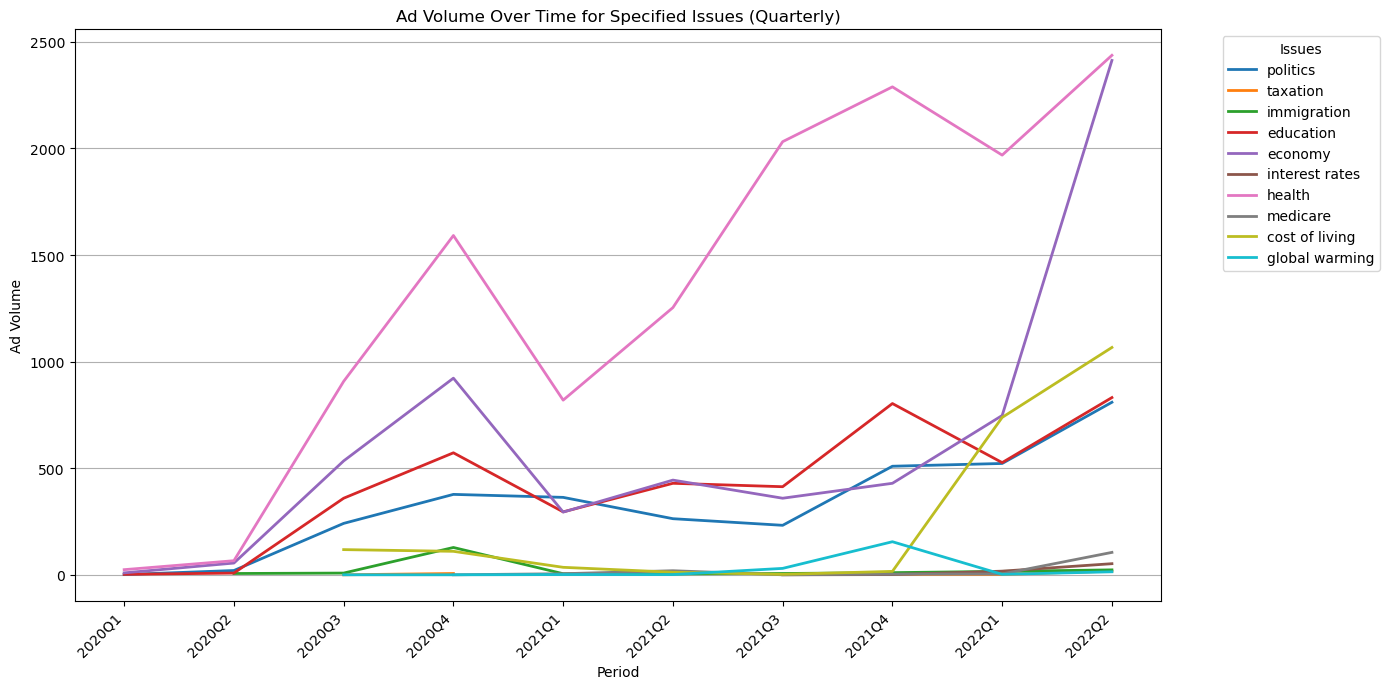

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

ad_volumes_pd = ad_volumes_df.withColumn("Period", concat_ws("Q", col("year"), col("quarter"))).orderBy("year", "quarter").toPandas()

plt.figure(figsize=(14, 7))
for issue in topic_keywords:
    plt.plot(ad_volumes_pd["Period"], ad_volumes_pd[issue], label=issue, linewidth = 2)
plt.xlabel('Period')
plt.ylabel('Ad Volume')
plt.title('Ad Volume Over Time for Specified Issues (Quarterly)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Issues', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Focusing on Political Party Accounts and their Target Demographics

In [29]:
from pyspark.sql.functions import col, count

df2 = df.select(*df.columns)

# keywords related to the parties and their leaders
party_keywords = [
    "Labor Party", "Anthony Albanese",
    "Liberal Party", "Scott Morrison",
    "Australian Greens", "Adam Bandt",
    "Katter's Australian Party", "Bob Katter"
]

# filter ads based on the keywords
filtered_ads = df2.filter(
    col("ad_creative_body").rlike("|".join(party_keywords))
)

page_ad_counts = filtered_ads.groupBy("page_name").agg(count("*").alias("ad_count"))
top_20_pages = page_ad_counts.orderBy(col("ad_count").desc()).limit(20)
top_20_pages_pd = top_20_pages.toPandas()
print(top_20_pages_pd)

                                   page_name  ad_count
0                     Australian Labor Party      1736
1                           Queensland Labor       464
2                 Liberal Party of Australia       437
3                                     Crikey       316
4               Greenpeace Australia Pacific       253
5                            Victorian Labor       252
6                               Bill Shorten       193
7                                Climate 200       189
8                   Senator Anthony Chisholm       172
9                            Stand Up For WA       163
10           Amnesty International Australia       157
11                          Anthony Albanese       149
12                            Mark Butler MP       147
13                                    GetUp!       146
14                            Julian Hill MP       121
15                         NSW Liberal Party       113
16  Armenian National Committee of Australia       106
17       A

In [30]:
from pyspark.sql.functions import col

scott_morrison_ads = df2.filter(col("page_name").rlike("(?i)Scott Morrison"))

scott_morrison_ad_count = scott_morrison_ads.count()

scott_morrison_page_counts = scott_morrison_ads.groupBy("page_name").count().orderBy(col("count").desc())
scott_morrison_page_counts.show(truncate=False)

+----------------------+-----+
|page_name             |count|
+----------------------+-----+
|Scott Morrison (ScoMo)|196  |
+----------------------+-----+



In [31]:
from pyspark.sql.functions import col

greens_ads = df2.filter(col("page_name").rlike("(?i)Australian Greens"))

greens_ad_count = greens_ads.count()

greens_page_counts = greens_ads.groupBy("page_name").count().orderBy(col("count").desc())
greens_page_counts.show(truncate=False)

+---------------------+-----+
|page_name            |count|
+---------------------+-----+
|The Australian Greens|43   |
+---------------------+-----+



In [32]:
from pyspark.sql.functions import col

adam_ads = df2.filter(col("page_name").rlike("(?i)Adam Brandt"))

adam_ad_count = adam_ads.count()

adam_page_counts = adam_ads.groupBy("page_name").count().orderBy(col("count").desc())
adam_page_counts.show(truncate=False)

+---------+-----+
|page_name|count|
+---------+-----+
+---------+-----+



In [33]:
from pyspark.sql.functions import col

katters_ads = df2.filter(col("page_name").rlike("(?i)Katter's Australian Party"))

katters_ad_count = katters_ads.count()

katters_page_counts = katters_ads.groupBy("page_name").count().orderBy(col("count").desc())
katters_page_counts.show(truncate=False)

+-------------------------+-----+
|page_name                |count|
+-------------------------+-----+
|Katter's Australian Party|81   |
+-------------------------+-----+



In [34]:
from pyspark.sql.functions import col

katter_ads = df2.filter(col("page_name").rlike("(?i)Bob Katter"))

katter_ad_count = katter_ads.count()

katter_page_counts = katter_ads.groupBy("page_name").count().orderBy(col("count").desc())
katter_page_counts.show(truncate=False)

+----------+-----+
|page_name |count|
+----------+-----+
|Bob Katter|5    |
+----------+-----+



### Looking at the 4 Major Parties in the 2022 Election

gender
Unknown    38086
female     47120
male       47660
Name: ad_count, dtype: int64
page_group  gender 
Greens      Unknown       79
            female       172
            male         162
Katter's    Unknown      348
            female       457
            male         463
Labor       Unknown    22311
            female     26738
            male       26986
Liberal     Unknown    15348
            female     19753
            male       20049
Name: ad_count, dtype: int64
age
             975
13-17       2037
18-24      21577
25-34      22470
35-44      23050
45-54      22895
55-64      22276
65+        17585
Unknown        1
Name: ad_count, dtype: int64


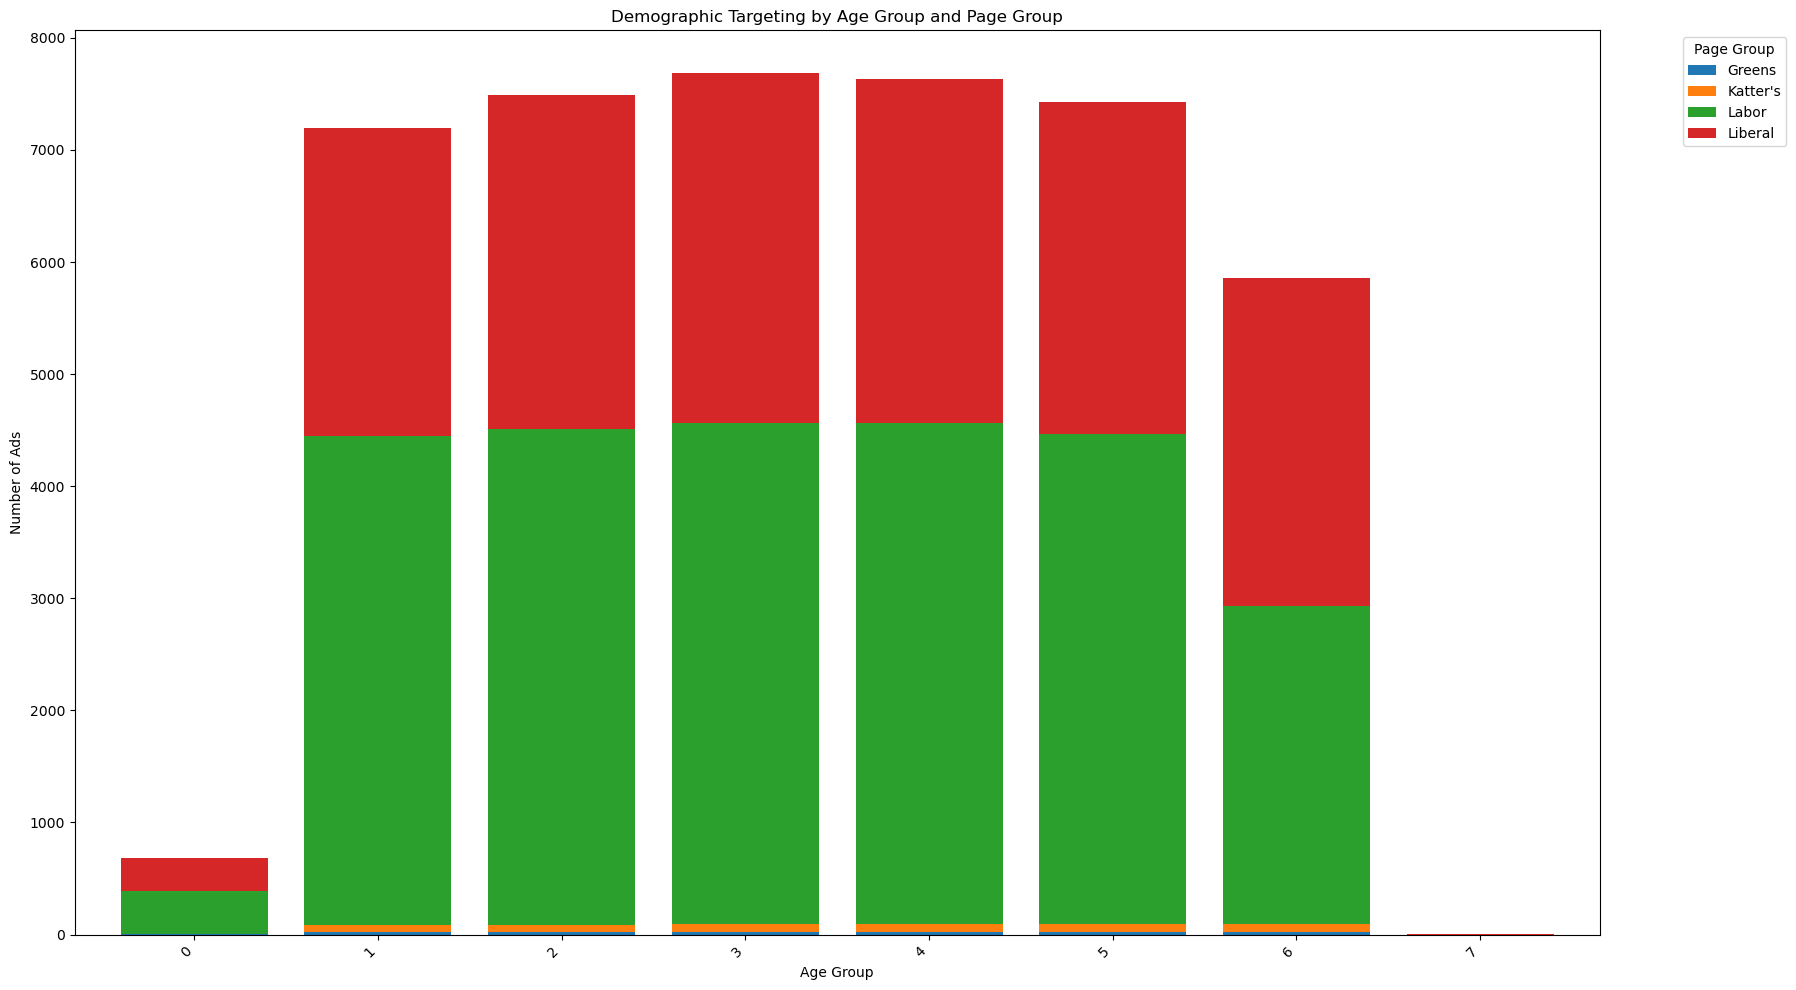

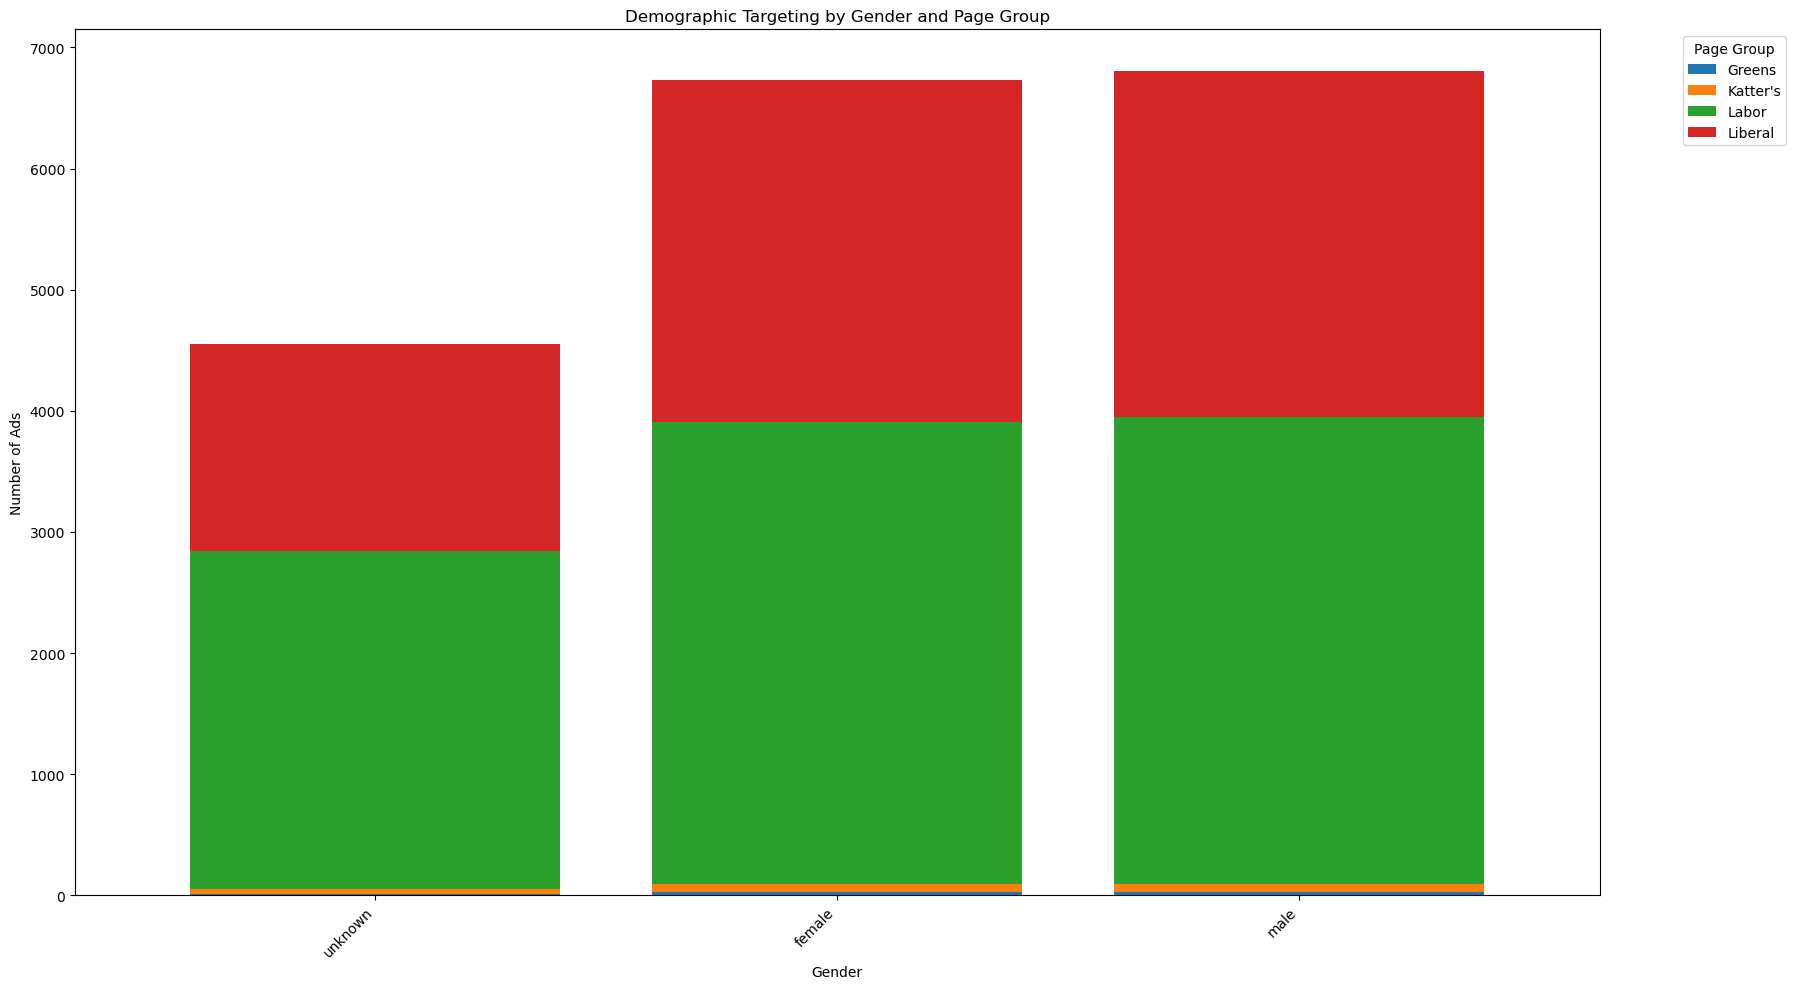

In [35]:
from pyspark.sql.functions import explode, col, when, count, lit
import pandas as pd
import matplotlib.pyplot as plt

# selecting pages that are relevant
facebook_pages = ["Australian Labor Party", "Liberal Party of Australia", "Katter's Australian Party", "The Australian Greens"]
party_ads = df2.filter(col("page_name").isin(facebook_pages))

# combine and rename the aggregates
party_ads = party_ads.withColumn("page_group",
    when(col("page_name") == "Australian Labor Party", "Labor")
    .when(col("page_name") == "Liberal Party of Australia", "Liberal")
    .when(col("page_name") == "Katter's Australian Party", "Katter's")
    .when(col("page_name") == "The Australian Greens", "Greens")
)

# explode the demographic data
demographics_page_agg = party_ads.select("page_group", explode(col("demographic_distribution")).alias("demographic"))

# handle missing or unnamed gender categories after exploding
demographics_page_agg = demographics_page_agg.withColumn("gender",
    when(col("demographic.gender") == "", "Unknown")
    .when(col("demographic.gender").isNull(), "Unknown")
    .when(col("demographic.gender") == "male", "male")
    .when(col("demographic.gender") == "female", "female")
    .otherwise("Unknown")
)

# select necessary columns for aggregation
demographics_page_agg = demographics_page_agg.select(
    col("page_group"),
    col("demographic.age").alias("age"),
    col("gender"),
    col("demographic.demographic_percentage").alias("percentage")
)

# aggregate by count of ads
ad_count_page_agg = demographics_page_agg.groupBy("page_group", "age", "gender").agg(count("*").alias("ad_count"))

ad_count_page_pd = ad_count_page_agg.toPandas()

print(ad_count_page_pd.groupby('gender')['ad_count'].sum())
print(ad_count_page_pd.groupby(['page_group', 'gender'])['ad_count'].sum())
print(ad_count_page_pd.groupby('age')['ad_count'].sum())

age_order = ["13-17", "18-24", "25-34", "35-44", "45-54", "55-64", "65+", "Unknown"]
ad_count_page_pd["age"] = pd.Categorical(ad_count_page_pd["age"], categories=age_order, ordered=True)

pivot_age_page = ad_count_page_pd.pivot_table(index=["age"], columns="page_group", values="ad_count", fill_value=0).reset_index()

pivot_age_page = pivot_age_page[['age', 'Greens', "Katter's", 'Labor', 'Liberal']]

plt.figure(figsize=(18, 10))
pivot_age_page.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.8)
plt.xlabel('Age Group')
plt.ylabel('Number of Ads')
plt.title('Demographic Targeting by Age Group and Page Group')
plt.legend(title='Page Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Filter out any empty or unnamed gender categories
ad_count_page_pd = ad_count_page_pd[ad_count_page_pd['gender'].isin(['male', 'female', 'Unknown'])]

pivot_gender_page = ad_count_page_pd.pivot_table(index=["gender"], columns="page_group", values="ad_count", fill_value=0).reset_index()

pivot_gender_page = pivot_gender_page[['gender', 'Greens', "Katter's", 'Labor', 'Liberal']]

plt.figure(figsize=(18, 10))
pivot_gender_page.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.8)
plt.xlabel('Gender')
plt.ylabel('Number of Ads')
plt.title('Demographic Targeting by Gender and Page Group')
plt.legend(title='Page Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', ticks=range(3), labels=['unknown', 'female', 'male'])
plt.tight_layout()
plt.show()

# Looking at URLs included in Ads to find the most Popular Internet Domains during the 2022 Election Campaign

In [36]:
from pyspark.sql.functions import col, length

non_empty_string_counts = df.select(
    (count(col("ad_creative_body").cast("string")) - count(when(length(col("ad_creative_body")) == 0, True))).alias("non_empty_ad_creative_body"),
    (count(col("ad_creative_link_caption").cast("string")) - count(when(length(col("ad_creative_link_caption")) == 0, True))).alias("non_empty_ad_creative_link_caption"),
    (count(col("ad_creative_link_description").cast("string")) - count(when(length(col("ad_creative_link_description")) == 0, True))).alias("non_empty_ad_creative_link_description"),
    (count(col("ad_creative_link_title").cast("string")) - count(when(length(col("ad_creative_link_title")) == 0, True))).alias("non_empty_ad_creative_link_title")
).collect()[0]

print(f"Non-empty rows in ad_creative_body: {non_empty_string_counts['non_empty_ad_creative_body']}")
print(f"Non-empty rows in ad_creative_link_caption: {non_empty_string_counts['non_empty_ad_creative_link_caption']}")
print(f"Non-empty rows in ad_creative_link_description: {non_empty_string_counts['non_empty_ad_creative_link_description']}")
print(f"Non-empty rows in ad_creative_link_title: {non_empty_string_counts['non_empty_ad_creative_link_title']}")

Non-empty rows in ad_creative_body: 226469
Non-empty rows in ad_creative_link_caption: 156650
Non-empty rows in ad_creative_link_description: 127229
Non-empty rows in ad_creative_link_title: 160673


In [37]:
from pyspark.sql.functions import col, size, count, when

non_empty_array_counts = df.select(
    (count(col("ad_creative_bodies").cast("string")) - count(when(size(col("ad_creative_bodies")) == 0, True))).alias("non_empty_ad_creative_bodies"),
    (count(col("ad_creative_link_captions").cast("string")) - count(when(size(col("ad_creative_link_captions")) == 0, True))).alias("non_empty_ad_creative_link_captions"),
    (count(col("ad_creative_link_descriptions").cast("string")) - count(when(size(col("ad_creative_link_descriptions")) == 0, True))).alias("non_empty_ad_creative_link_descriptions"),
    (count(col("ad_creative_link_titles").cast("string")) - count(when(size(col("ad_creative_link_titles")) == 0, True))).alias("non_empty_ad_creative_link_titles")
).collect()[0]

print(f"Non-empty rows in ad_creative_bodies: {non_empty_array_counts['non_empty_ad_creative_bodies']}")
print(f"Non-empty rows in ad_creative_link_captions: {non_empty_array_counts['non_empty_ad_creative_link_captions']}")
print(f"Non-empty rows in ad_creative_link_descriptions: {non_empty_array_counts['non_empty_ad_creative_link_descriptions']}")
print(f"Non-empty rows in ad_creative_link_titles: {non_empty_array_counts['non_empty_ad_creative_link_titles']}")


Non-empty rows in ad_creative_bodies: 10813058
Non-empty rows in ad_creative_link_captions: 11110793
Non-empty rows in ad_creative_link_descriptions: 5154236
Non-empty rows in ad_creative_link_titles: 9231222


In [38]:
from pyspark.sql.functions import col, array_contains
from pyspark.sql.functions import sum as spark_sum

df_check = df.select(*df.columns)

# check if string column values are contained in their corresponding array columns
comparison_results = df_check.select(
    (array_contains(col("ad_creative_bodies"), col("ad_creative_body"))).alias("body_match"),
    (array_contains(col("ad_creative_link_captions"), col("ad_creative_link_caption"))).alias("caption_match"),
    (array_contains(col("ad_creative_link_descriptions"), col("ad_creative_link_description"))).alias("description_match"),
    (array_contains(col("ad_creative_link_titles"), col("ad_creative_link_title"))).alias("title_match")
)

# count matches for each pair of columns
match_counts = comparison_results.select(
    spark_sum(col("body_match").cast("int")).alias("body_match_count"),
    spark_sum(col("caption_match").cast("int")).alias("caption_match_count"),
    spark_sum(col("description_match").cast("int")).alias("description_match_count"),
    spark_sum(col("title_match").cast("int")).alias("title_match_count")
)

match_counts.show()

+----------------+-------------------+-----------------------+-----------------+
|body_match_count|caption_match_count|description_match_count|title_match_count|
+----------------+-------------------+-----------------------+-----------------+
|               0|                  0|                      0|                0|
+----------------+-------------------+-----------------------+-----------------+



Here, as we can see the string columns for the URLs in ads have substantially lower non-empty rows when compared to their counterpart array columns. Upon checking, I found that not a single value in the string columns matches with the value in their respective array columns. Hence, I will check for URLs in both columns and if I find the same URL in the same row in both the columns, I will only count it once to maintain consistency in the analysis.

/tmp/ipykernel_419291/917228870.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', len(top_20_domains))


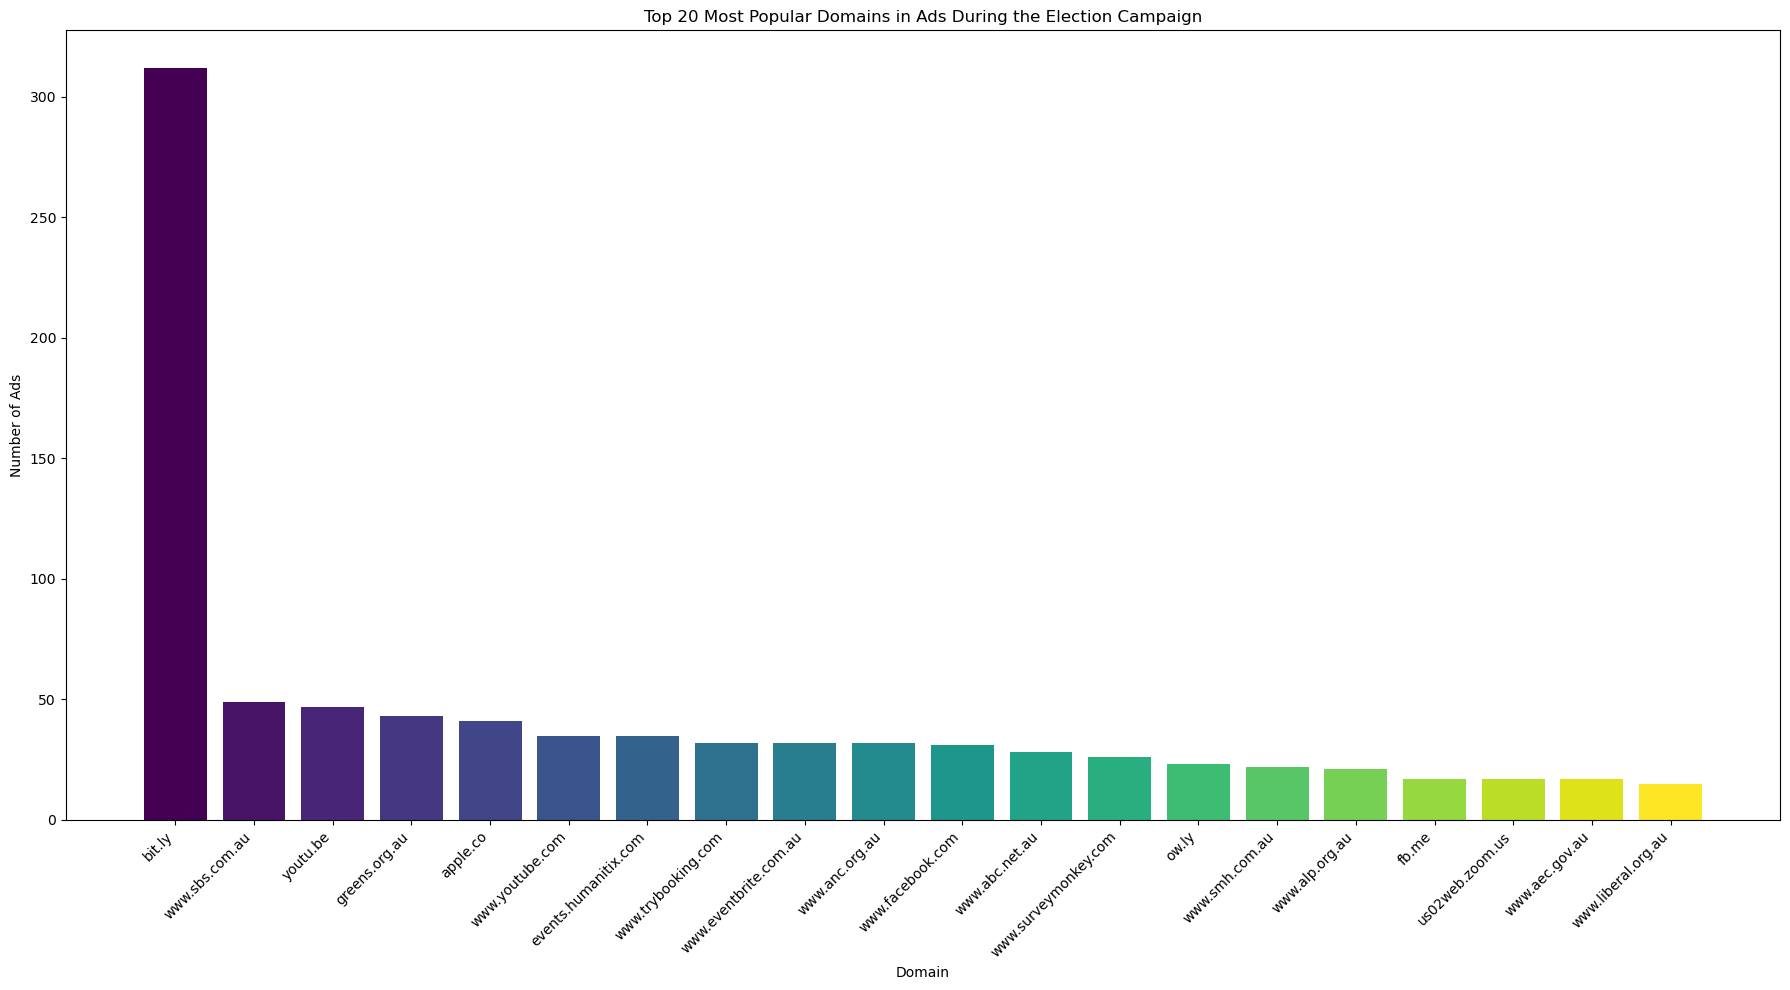

In [45]:
from pyspark.sql.functions import col, explode, regexp_extract, lower, count, to_date, lit, array_union
import matplotlib.cm as cm

df3 = df.select(*df.columns)

# filter ads for the election campaign period (January 2022 to May 2022)
election_campaign_ads = df3.filter((col("ad_creation_time") >= to_date(lit("2022-01-01"))) & 
                                   (col("ad_creation_time") <= to_date(lit("2022-05-21"))))

# URL pattern
url_pattern = r'(https?://[^\s]+)'

# extract URLs from array columns and string columns
combined_array_column = array_union(array_union(col("ad_creative_link_descriptions"), col("ad_creative_link_captions")), 
                                    array_union(col("ad_creative_link_titles"), col("ad_creative_bodies")))

urls_from_arrays = election_campaign_ads.select(
    explode(combined_array_column).alias("description")
).select(
    regexp_extract(col("description"), url_pattern, 0).alias("url")
)

urls_from_strings = election_campaign_ads.select(
    regexp_extract(col("ad_creative_link_description"), url_pattern, 0).alias("url")
).union(
    election_campaign_ads.select(regexp_extract(col("ad_creative_link_caption"), url_pattern, 0).alias("url"))
).union(
    election_campaign_ads.select(regexp_extract(col("ad_creative_link_title"), url_pattern, 0).alias("url"))
).union(
    election_campaign_ads.select(regexp_extract(col("ad_creative_body"), url_pattern, 0).alias("url"))
)

all_urls_df = urls_from_arrays.union(urls_from_strings).distinct()

all_urls_df = all_urls_df.filter(col("url") != "")

all_urls_df = all_urls_df.withColumn("domain", lower(regexp_extract(col("url"), r'https?://([^/]+)', 1)))

domain_counts = all_urls_df.groupBy("domain").agg(count("*").alias("count"))

domain_counts_pd = domain_counts.toPandas()

domain_counts_pd = domain_counts_pd.sort_values(by="count", ascending=False)

plt.figure(figsize=(18, 10))
top_20_domains = domain_counts_pd.head(20)
colormap = cm.get_cmap('viridis', len(top_20_domains))
color = [colormap(i) for i in range(len(top_20_domains))]
plt.bar(top_20_domains["domain"], top_20_domains["count"], color=color)
plt.xlabel('Domain')
plt.ylabel('Number of Ads')
plt.title('Top 20 Most Popular Domains in Ads During the Election Campaign')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Here, I can see that the most popular domain in URL links in ads during the election campaign of 2022 was `bit.ly`. But, `bit.ly` is just a URL shortener just like `tinyurl`, so the contents of the URL links cannot be implied by the shortened URLs.

# Looking at a Specific Hashtag & What Facebook Page used it the most

/tmp/ipykernel_419291/1359782910.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('plasma', len(top_10_hashtags))


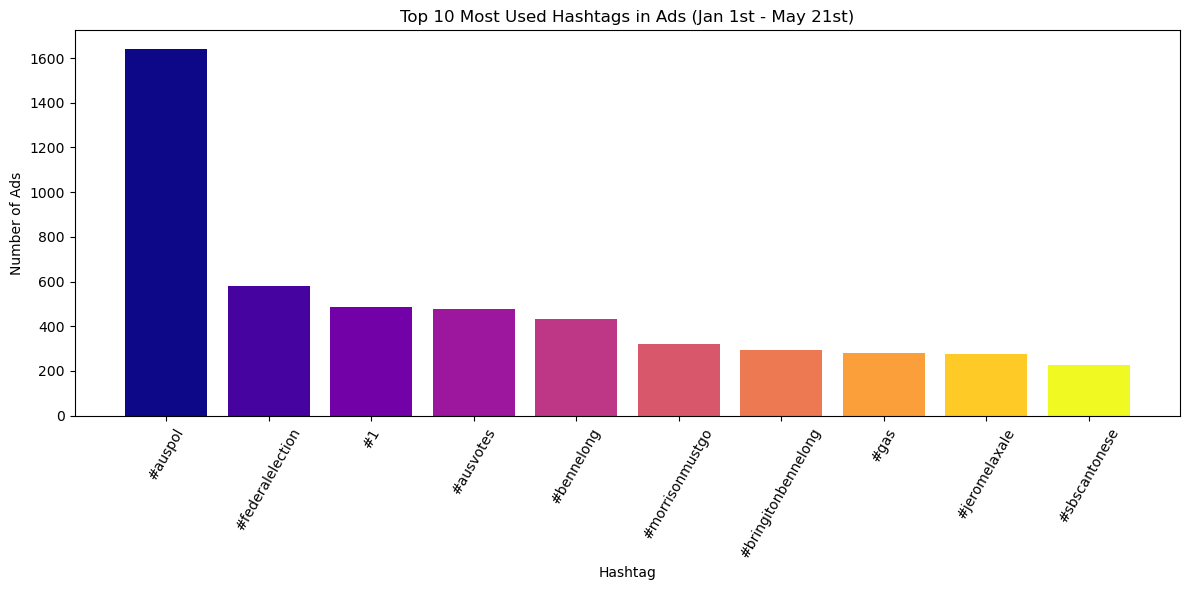

In [48]:
from pyspark.sql.functions import col, to_date, lit, explode
import re
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
import matplotlib.pyplot as plt

df4 = df.select(*df.columns)

# define a UDF to extract hashtags from text
def extract_hashtags(text):
    return re.findall(r"#\w+", text.lower())

extract_hashtags_udf = udf(extract_hashtags, ArrayType(StringType()))

# filter ads for the election campaign period (January 1st to May 21st)
campaign_ads = df4.filter((col("ad_creation_time") >= to_date(lit("2022-01-01"))) & 
                          (col("ad_creation_time") <= to_date(lit("2022-05-21"))))

# apply the UDF to extract hashtags from relevant columns
campaign_ads = campaign_ads.withColumn("hashtags",
                                       extract_hashtags_udf(col("ad_creative_body")))

hashtags_df = campaign_ads.select(explode(col("hashtags")).alias("hashtag"))

hashtag_counts = hashtags_df.groupBy("hashtag").count().orderBy("count", ascending=False)

hashtag_counts_pd = hashtag_counts.toPandas()

top_10_hashtags = hashtag_counts_pd.head(10)

colormap = cm.get_cmap('plasma', len(top_10_hashtags))
color = [colormap(i) for i in range(len(top_10_hashtags))]
plt.figure(figsize=(12, 6))
plt.bar(top_10_hashtags["hashtag"], top_10_hashtags["count"], color=color)
plt.xlabel('Hashtag')
plt.ylabel('Number of Ads')
plt.title('Top 10 Most Used Hashtags in Ads (Jan 1st - May 21st)')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

                                page_name  count
0        Councillor Jerome Laxale - Labor    239
1                         It's Not a Race    135
2           Epping NSW Labor branch - ALP    109
3  North Sydney's Kylea Tink for Canberra    104
4               Master Builders Australia    100
5                         Dr Monique Ryan     95
6                         Bennelong Labor     82
7    James Thomson - Nationals for Hunter     46
8                              Gen united     39
9                           Hanabeth Luke     39


/tmp/ipykernel_419291/2370076124.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('inferno', len(top_accounts_pd))


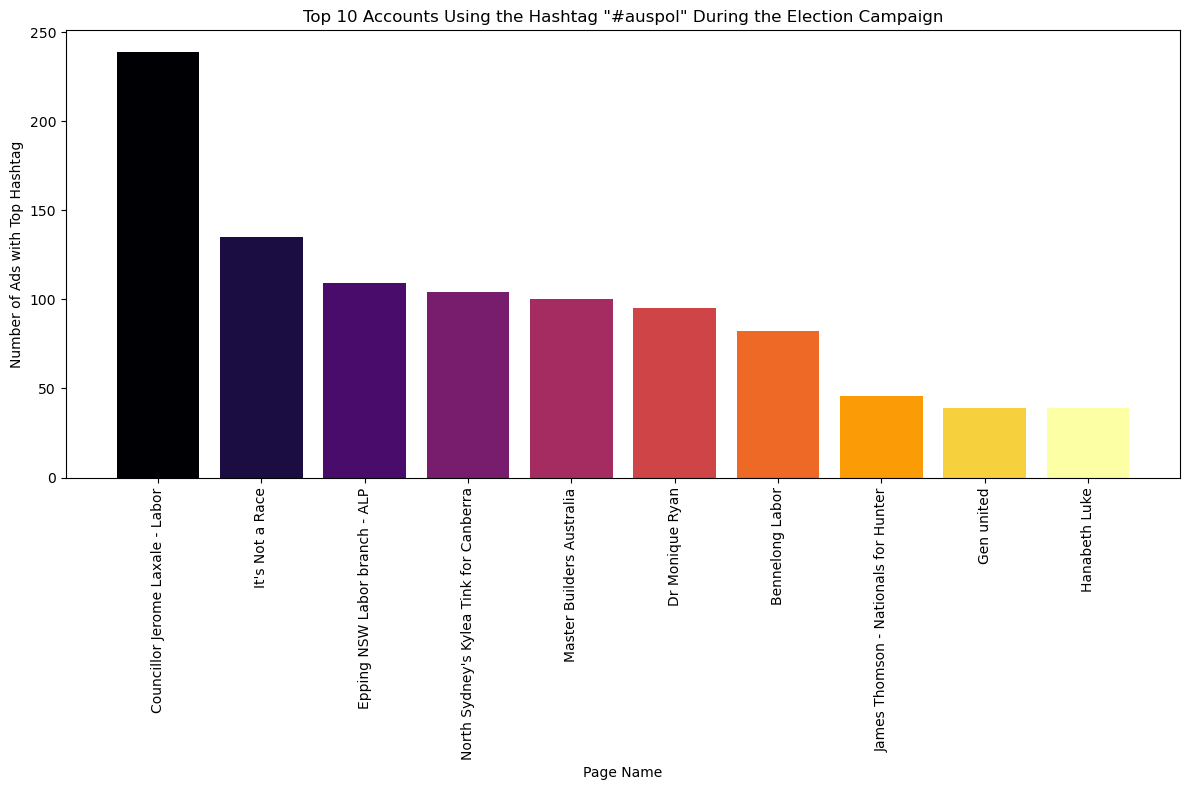

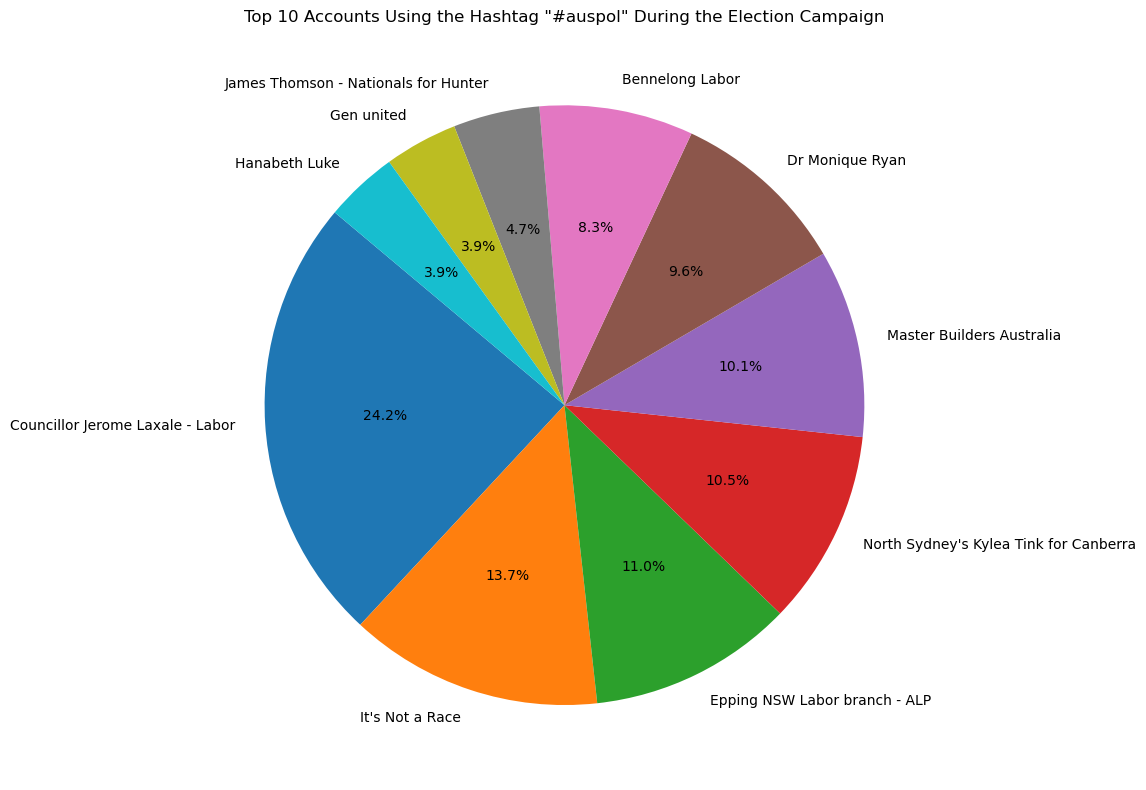

In [49]:
top_hashtag = hashtag_counts_pd.head(1)["hashtag"].values[0]

ads_with_top_hashtag = campaign_ads.filter(array_contains(col("hashtags"), top_hashtag))

top_accounts = ads_with_top_hashtag.groupBy("page_name").agg(count("id").alias("count")).orderBy("count", ascending=False)

top_accounts_pd = top_accounts.limit(10).toPandas()

print(top_accounts_pd)

colormap = cm.get_cmap('inferno', len(top_accounts_pd))
color = [colormap(i) for i in range(len(top_accounts_pd))]
plt.figure(figsize=(12, 8))
plt.bar(top_accounts_pd["page_name"], top_accounts_pd["count"], color=color)
plt.xlabel('Page Name')
plt.ylabel('Number of Ads with Top Hashtag')
plt.title(f'Top 10 Accounts Using the Hashtag "{top_hashtag}" During the Election Campaign')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.pie(top_accounts_pd["count"], labels=top_accounts_pd["page_name"], autopct='%1.1f%%', startangle=140)
plt.title(f'Top 10 Accounts Using the Hashtag "{top_hashtag}" During the Election Campaign')
plt.tight_layout()
plt.show()

# Looking at the Spend by State/Territory during the 2022 Federal Election by the Two Major Parties' and Their Respective Leaders' Pages

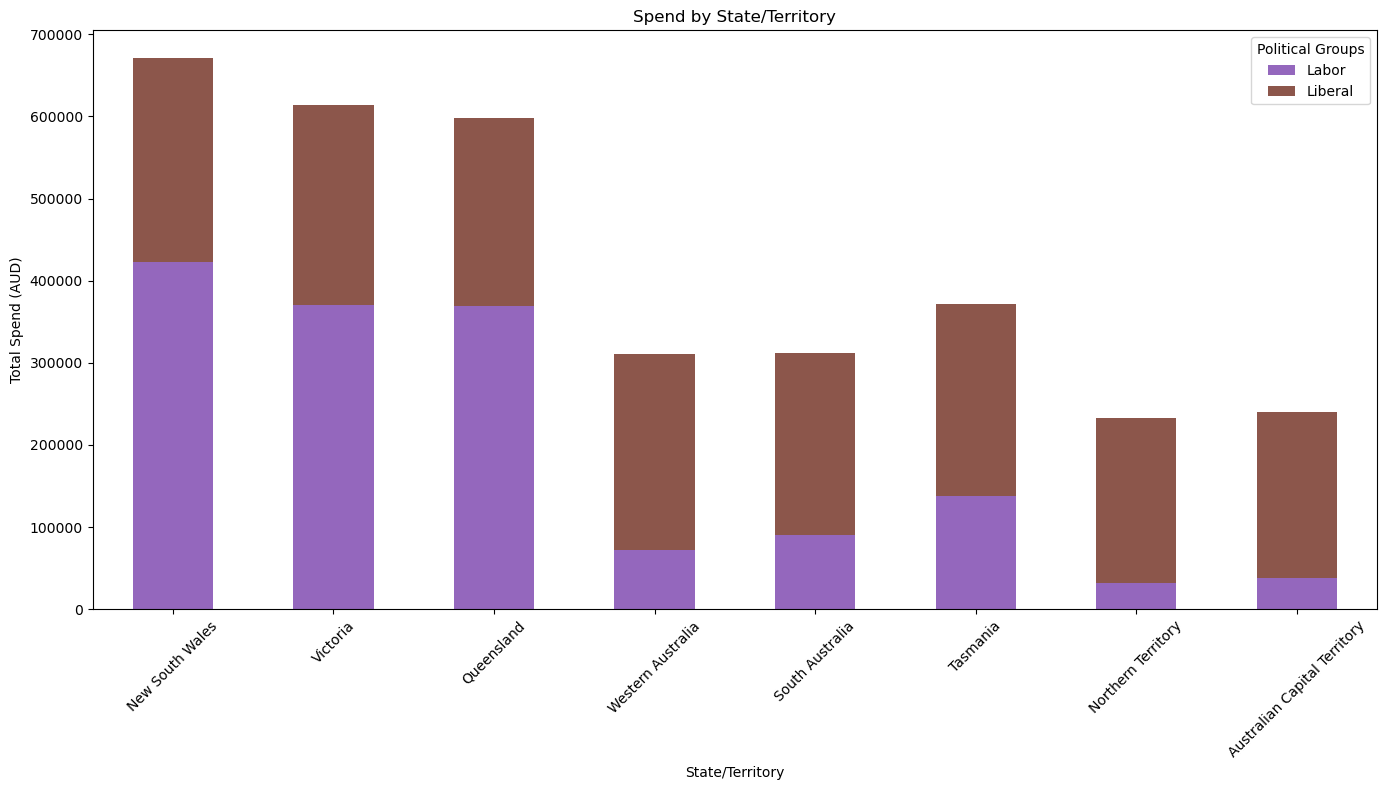

In [50]:
from pyspark.sql.functions import col, when, explode, sum as spark_sum, lit, to_date
import matplotlib.pyplot as plt
import pandas as pd

# define the page groups
page_groups = {
    "Labor": ["Anthony Albanese", "Australian Labor Party"],
    "Liberal": ["Scott Morrison (ScoMo)", "Liberal Party of Australia"]
}

# filter ads for the election campaign period (January 2022 to May 2022)
df5 = df.filter((col("ad_creation_time") >= to_date(lit("2022-01-01"))) &
                (col("ad_creation_time") <= to_date(lit("2022-05-21"))))

# initialize the page_group column
df5 = df5.withColumn("page_group", lit(None).cast("string"))

# create a new column for page groups
for group, pages in page_groups.items():
    df5 = df5.withColumn("page_group",
                         when(col("page_name").isin(pages), group).otherwise(col("page_group"))
                         )

# explode the region distribution data
regions_exp = df5.select("page_group", "spend_lower_bound", explode(col("region_distribution")).alias("region"))

# select necessary columns for aggregation
regions_exp = regions_exp.select(
    col("page_group"),
    col("region.region").alias("state"),
    col("spend_lower_bound").alias("spend")
)

state_spend = regions_exp.groupBy("page_group", "state").agg(spark_sum("spend").alias("total_spend"))

state_spend_pd = state_spend.toPandas()

state_order = ["New South Wales", "Victoria", "Queensland", "Western Australia", "South Australia", "Tasmania", "Northern Territory", "Australian Capital Territory"]
state_spend_pd['state'] = pd.Categorical(state_spend_pd['state'], categories=state_order, ordered=True)
state_group_spend = state_spend_pd.groupby(['state', 'page_group'], observed=True).sum(numeric_only=True).unstack().fillna(0)

state_group_spend.columns = state_group_spend.columns.droplevel()
state_group_spend.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#9467bd', '#8c564b'])
plt.xlabel('State/Territory')
plt.ylabel('Total Spend (AUD)')
plt.title('Spend by State/Territory')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Political Groups', labels=['Labor', 'Liberal'])
plt.show()

In [51]:
state_group_spend.reset_index(inplace=True)
state_group_spend.columns.name = None  # Remove the name of the columns index
state_group_spend.columns = ['State', 'Labor', 'Liberal']  # Rename the columns
state_group_spend

,State,Labor,Liberal
0,New South Wales,423000.0,248200.0
1,Victoria,370100.0,244000.0
2,Queensland,369400.0,229100.0
3,Western Australia,71600.0,239500.0
4,South Australia,90400.0,221700.0
5,Tasmania,138300.0,233300.0
6,Northern Territory,31400.0,201500.0
7,Australian Capital Territory,37700.0,202000.0


In [52]:
print(state_group_spend)

                          State     Labor   Liberal
0               New South Wales  423000.0  248200.0
1                      Victoria  370100.0  244000.0
2                    Queensland  369400.0  229100.0
3             Western Australia   71600.0  239500.0
4               South Australia   90400.0  221700.0
5                      Tasmania  138300.0  233300.0
6            Northern Territory   31400.0  201500.0
7  Australian Capital Territory   37700.0  202000.0


# Analysis of Ad Campaign Durations and Political Alignment Composition for Topics on Economy, Healthcare, and Cost of Living

Here, we count each ad only once for the duration, as at the start of our analysis we had removed duplicates, the calculation of the durations relies on unique ads' timestamps.

Ads by Topic:
            topic  avg_duration
0      Healthcare      7.600000
2  Cost of Living      1.250000
3         Economy      1.653061


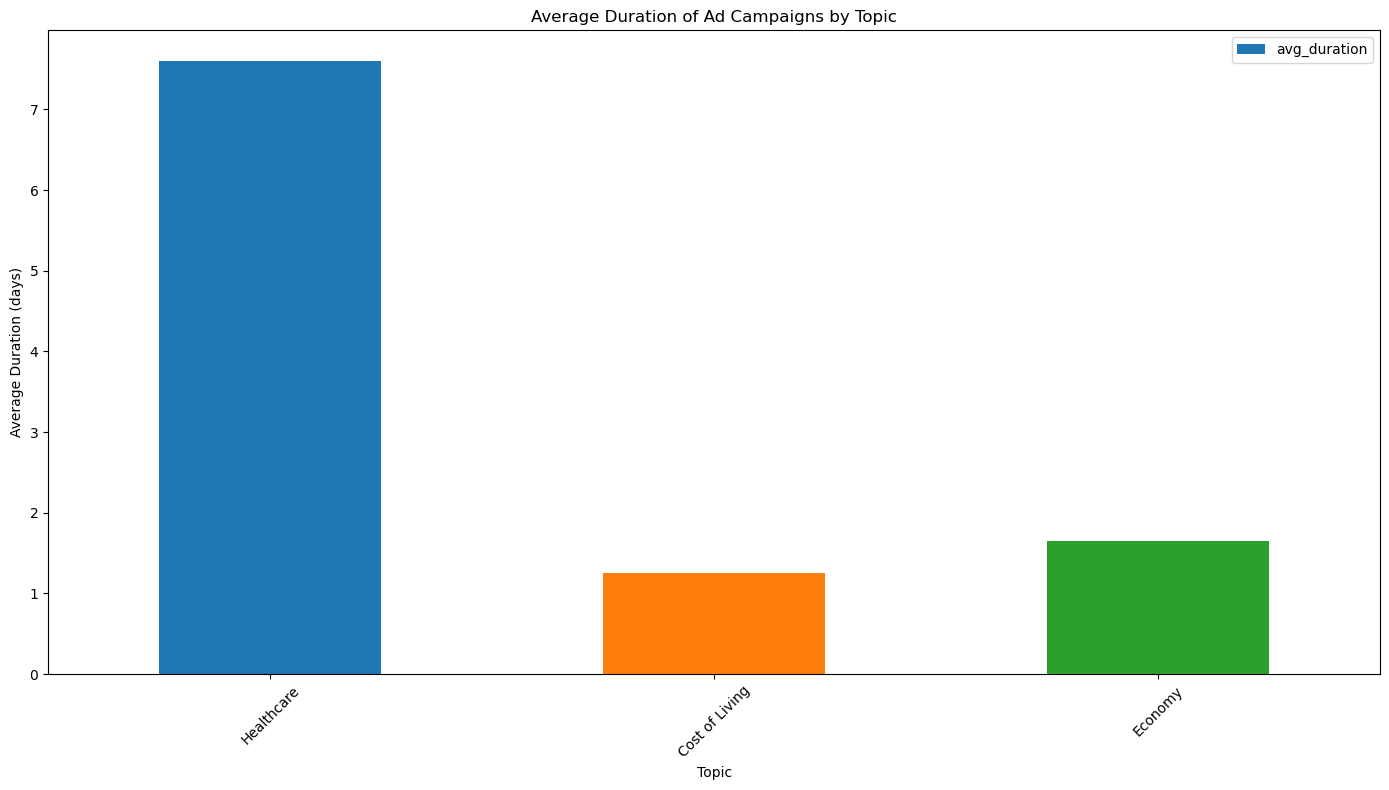

In [56]:
from pyspark.sql.functions import col, when, lit, to_date, datediff, expr
import matplotlib.pyplot as plt
import pandas as pd

page_groups = {
    "Labor": ["Anthony Albanese", "Australian Labor Party"],
    "Liberal": ["Scott Morrison (ScoMo)", "Liberal Party of Australia"]
}

# define topics with comprehensive keywords
topics = {
    "Healthcare": ["health", "hospital", "medicine", "doctor", "nurse", "healthcare", "medical"],
    "Economy": ["economy", "tax", "budget", "finance", "economic", "job", "employment", "business"],
    "Cost of Living": ["cost of living", "living cost", "rent", "mortgage", "utility", "expenses", "food prices", "housing"]
}

df6 = df.filter((col("ad_creation_time") >= to_date(lit("2022-01-01"))) &
                (col("ad_creation_time") <= to_date(lit("2022-05-21"))))

df6 = df6.withColumn("topic", lit(None).cast("string"))

for topic, keywords in topics.items():
    condition = expr(" or ".join([f"ad_creative_body like '%{keyword}%' or ad_creative_link_title like '%{keyword}%'" for keyword in keywords]))
    df6 = df6.withColumn("topic", when(condition, topic).otherwise(col("topic")))

df6 = df6.withColumn("duration", datediff(col("ad_delivery_stop_time"), col("ad_delivery_start_time")))

duration_stats = df6.groupBy("topic").agg(
    expr("avg(duration)").alias("avg_duration")
)

duration_stats_pd = duration_stats.toPandas()

duration_stats_pd = duration_stats_pd[duration_stats_pd['topic'].notna()]

print("Ads by Topic:")
print(duration_stats_pd)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
duration_stats_pd.plot(kind='bar', x='topic', y='avg_duration', figsize=(14, 8), color=colors)
plt.xlabel('Topic')
plt.ylabel('Average Duration (days)')
plt.title('Average Duration of Ad Campaigns by Topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

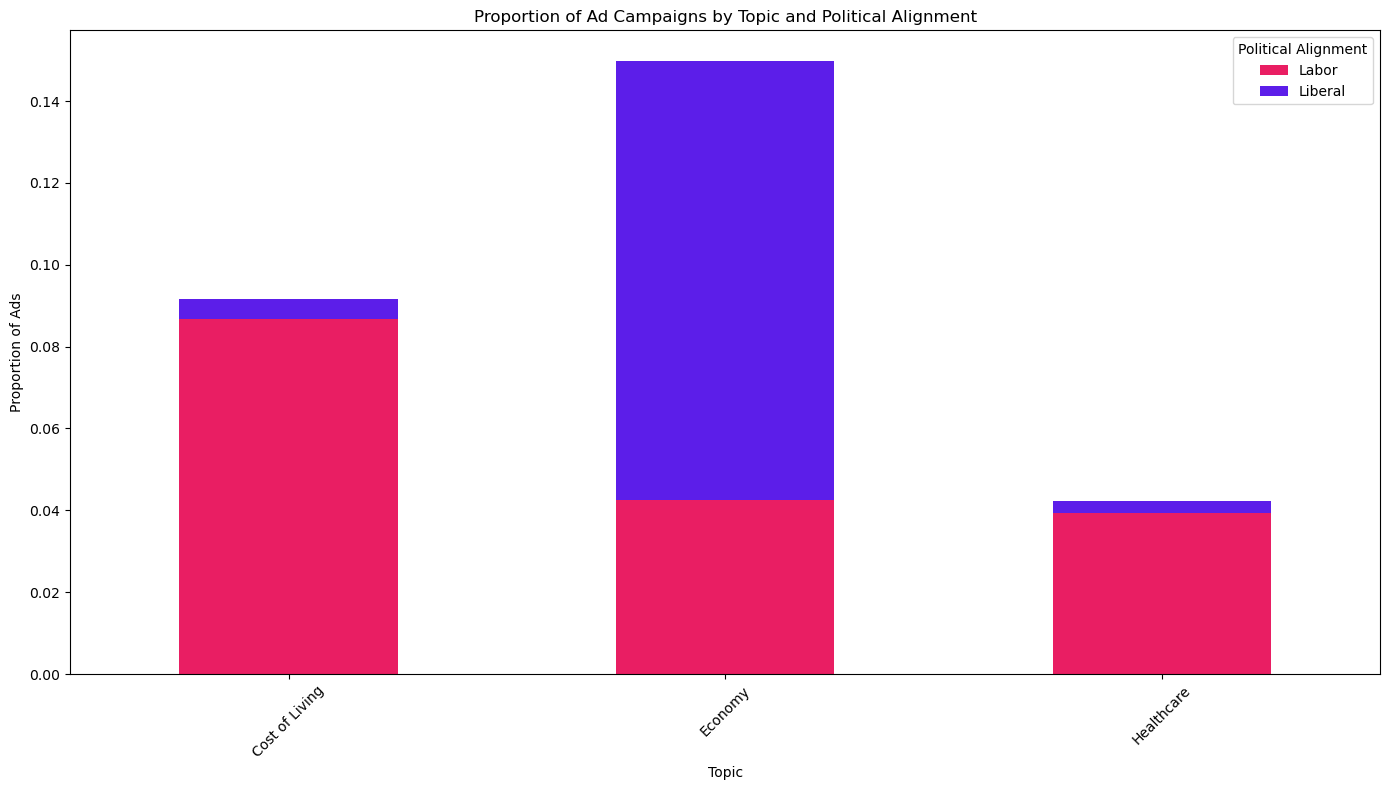

In [54]:
from pyspark.sql.functions import col, when, lit, to_date, datediff, expr, lower
import matplotlib.pyplot as plt
import pandas as pd

page_groups = {
    "Labor": ["Anthony Albanese", "Australian Labor Party"],
    "Liberal": ["Scott Morrison (ScoMo)", "Liberal Party of Australia"]
}

topics = {
    "Healthcare": ["health", "hospital", "medicine", "doctor", "nurse", "healthcare", "medical"],
    "Economy": ["economy", "tax", "budget", "finance", "economic", "job", "employment", "business"],
    "Cost of Living": ["cost of living", "living cost", "rent", "mortgage", "utility", "expenses", "food prices", "housing"]
}

df6 = df.filter((col("ad_creation_time") >= lit("2022-01-01")) &
                (col("ad_creation_time") <= lit("2022-05-21")))

df6 = df6.withColumn("topic", lit(None).cast("string"))
df6 = df6.withColumn("alignment", lit(None).cast("string"))

for topic, keywords in topics.items():
    condition = expr(" or ".join([f"lower(ad_creative_body) like '%{keyword}%' or lower(ad_creative_link_title) like '%{keyword}%'" for keyword in keywords]))
    df6 = df6.withColumn("topic", when(condition, topic).otherwise(col("topic")))

for alignment, pages in page_groups.items():
    condition = expr(" or ".join([f"page_name like '%{page}%'" for page in pages]))
    df6 = df6.withColumn("alignment", when(condition, alignment).otherwise(col("alignment")))

df6 = df6.withColumn("duration", when(col("ad_delivery_stop_time").isNotNull() & col("ad_delivery_start_time").isNotNull(),
                                      datediff(col("ad_delivery_stop_time"), col("ad_delivery_start_time"))).otherwise(lit(None)))

duration_stats = df6.groupBy("topic", "alignment").count()

duration_stats_pd = duration_stats.toPandas()

duration_stats_pd = duration_stats_pd[duration_stats_pd['topic'].notna()]

duration_stats_pivot = duration_stats_pd.pivot(index='topic', columns='alignment', values='count').fillna(0)
duration_stats_pivot['Total'] = duration_stats_pivot.sum(axis=1)
duration_stats_pivot['Labor'] = duration_stats_pivot['Labor'] / duration_stats_pivot['Total']
duration_stats_pivot['Liberal'] = duration_stats_pivot['Liberal'] / duration_stats_pivot['Total']

ax = duration_stats_pivot[['Labor', 'Liberal']].plot(kind='bar', stacked=True, figsize=(14, 8), color=['#E91E63', '#5C1EE9'])
plt.xlabel('Topic')
plt.ylabel('Proportion of Ads')
plt.title('Proportion of Ad Campaigns by Topic and Political Alignment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Political Alignment')
plt.show()

# Ad Impressions of Both Political Parties on Different Age Groups

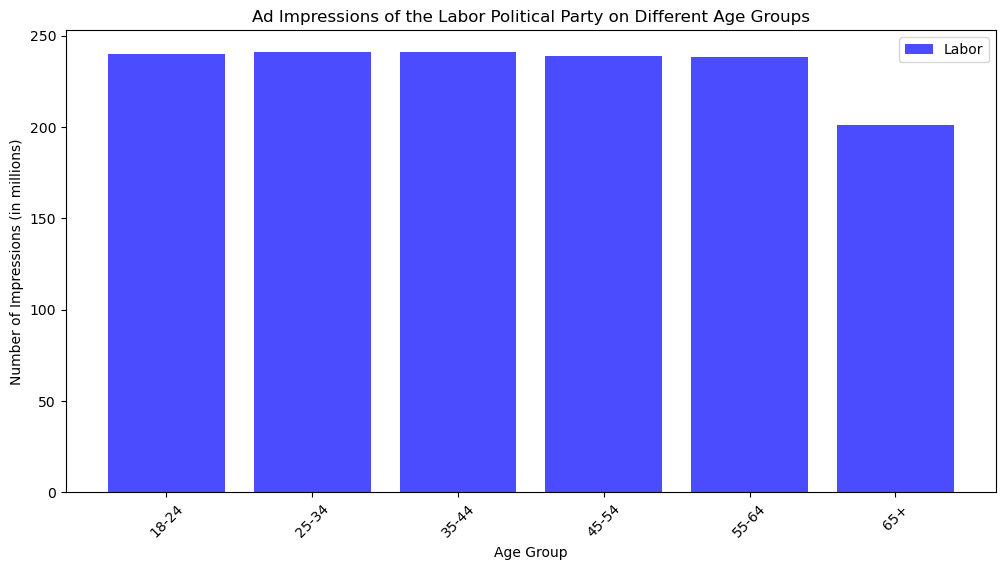

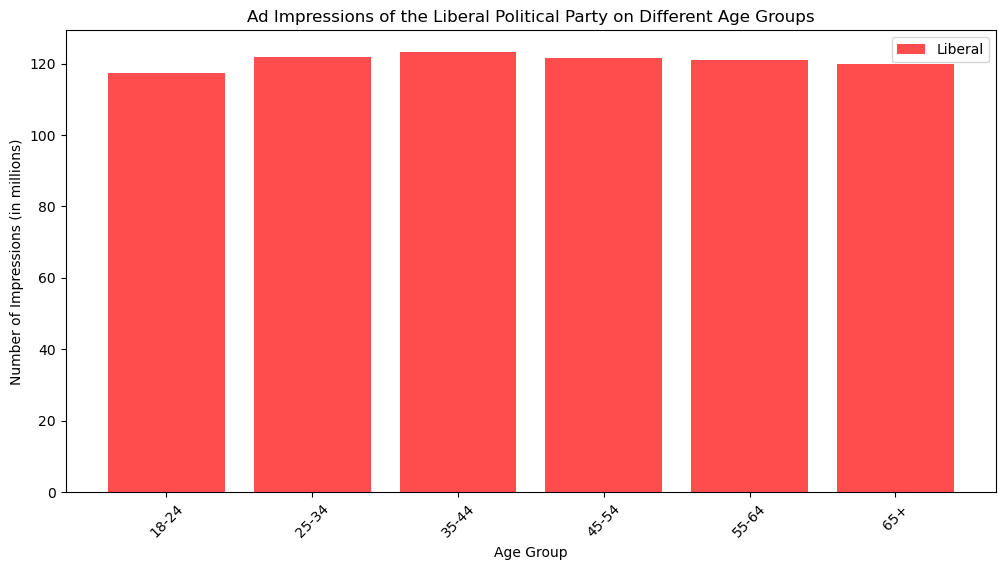

In [58]:
def process_ads(political_group):
    condition = expr(" or ".join([f"page_name like '%{page}%'" for page in page_groups[political_group]]))
    ads = df.filter(condition)

    # explode the demographic_distribution array column
    ads = ads.withColumn("demographic", explode("demographic_distribution")) \
             .withColumn("age", col("demographic.age")) \
             .withColumn("impressions", col("impressions.lower_bound").cast("double")) \
             .select("age", "impressions")

    # filter out unwanted age groups and aggregate impressions by age group
    ads = ads.filter(col("age").isin(["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]))
    impressions_stats = ads.groupBy("age").agg(_sum("impressions").alias("total_impressions")).toPandas()
    
    # convert impressions to millions
    impressions_stats["total_impressions"] = impressions_stats["total_impressions"] / 1e6

    age_order = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
    impressions_stats["age"] = pd.Categorical(impressions_stats["age"], categories=age_order, ordered=True)
    impressions_stats = impressions_stats.sort_values("age")

    return impressions_stats

labor_impressions_stats = process_ads('Labor')
liberal_impressions_stats = process_ads('Liberal')

plt.figure(figsize=(12, 6))
plt.bar(labor_impressions_stats['age'], labor_impressions_stats['total_impressions'], color='blue', alpha=0.7, label='Labor')
plt.title('Ad Impressions of the Labor Political Party on Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Impressions (in millions)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(liberal_impressions_stats['age'], liberal_impressions_stats['total_impressions'], color='red', alpha=0.7, label='Liberal')
plt.title('Ad Impressions of the Liberal Political Party on Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Impressions (in millions)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<div style="text-align: center;">
    <h1>THE END</h1>
</div>